프로젝트에서 지역별 인구수를 타나내는 지도 시각화를 구현해야 하는 일이 있어서 
직관적으로 지도를 그릴 수 있는 라이브러리를 찾아 보았다 그렇게 해서 선택한 
라이브러리는 geopandas였고 전달하고자 하는 정보를 더 효과적으로 시각화 할 수 있었다.

1) 서울시 1인 가구 데이터

시각화에는 서울시 1인가구(연령별) 통계 데이터를 사용하였고, 분석을 위하여 전처리 한 데이터셋은 다음과 같다. 
https://data.seoul.go.kr/dataList/10995/S/2/datasetView.do

In [4]:
import geopandas as gpd  
from fiona.crs import from_epsg
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib

In [5]:
matplotlib.matplotlib_fname()

'C:\\Users\\chanh\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [6]:
file_name = 'data/1인가구(연령별).xlsx'
df = pd.read_excel(file_name)
df

,자치구별,연도,연령별,1인가구수
0,종로구,2022,소계,28424
1,종로구,2022,20세미만,503
2,종로구,2022,20~24세,3318
3,종로구,2022,25~29세,4913
4,종로구,2022,30~34세,3366
...,...,...,...,...
395,강동구,2022,65~69세,4879
396,강동구,2022,70~74세,3446
397,강동구,2022,75~79세,2439
398,강동구,2022,80~84세,1850


In [7]:
gp = df[df['연령별']=='소계']
gp  # 지역별 1인 가구수

,자치구별,연도,연령별,1인가구수
0,종로구,2022,소계,28424
16,중구,2022,소계,25247
32,용산구,2022,소계,41437
48,성동구,2022,소계,46548
64,광진구,2022,소계,69391
80,동대문구,2022,소계,68169
96,중랑구,2022,소계,64334
112,성북구,2022,소계,67222
128,강북구,2022,소계,51134
144,도봉구,2022,소계,39744


In [8]:
gp2 = gp.rename(columns={"자치구별":"자치구"})
gp2

,자치구,연도,연령별,1인가구수
0,종로구,2022,소계,28424
16,중구,2022,소계,25247
32,용산구,2022,소계,41437
48,성동구,2022,소계,46548
64,광진구,2022,소계,69391
80,동대문구,2022,소계,68169
96,중랑구,2022,소계,64334
112,성북구,2022,소계,67222
128,강북구,2022,소계,51134
144,도봉구,2022,소계,39744


In [9]:
gp2.count()

자치구      25
연도       25
연령별      25
1인가구수    25
dtype: int64

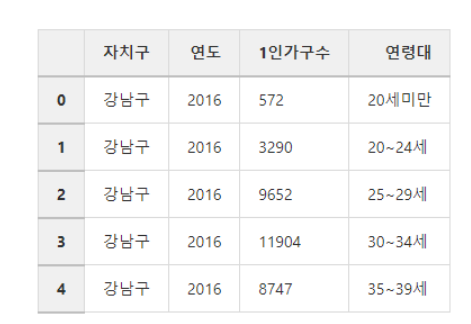

## 기본 지도 내용

In [10]:
seoul_file = "data/kostat/seoul_municipalities.shp"
seoul = gpd.read_file(seoul_file, encoding='utf-8')    # encoding='euckr'
seoul

gpd_admin_gu = seoul.rename(columns={'name':'자치구'})
gpd_admin_gu

,code,자치구,name_eng,base_year,geometry
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11540 37.557..."
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07076 37.521..."
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.05872 37.526..."
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01671 37.522..."
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.96109 37.49100, 126.96122 37.491..."
5,11200,동작구,Dongjak-gu,2013,"POLYGON ((126.98224 37.50931, 126.98240 37.502..."
6,11190,영등포구,Yeongdeungpo-gu,2013,"POLYGON ((126.89185 37.54737, 126.89516 37.545..."
7,11180,금천구,Geumcheon-gu,2013,"POLYGON ((126.90156 37.47754, 126.90192 37.477..."
8,11170,구로구,Guro-gu,2013,"POLYGON ((126.82688 37.50549, 126.82694 37.505..."
9,11160,강서구,Gangseo-gu,2013,"POLYGON ((126.79576 37.57881, 126.79574 37.578..."


In [11]:
gpd_admin_gu.count()

code         25
자치구          25
name_eng     25
base_year    25
geometry     25
dtype: int64

# 자치구로 병합

In [12]:
gpd_gu = pd.merge(gpd_admin_gu, gp2) # seoul과 gpd_admin_gu 합친것
gpd_gu

,code,자치구,name_eng,base_year,geometry,연도,연령별,1인가구수
0,11250,강동구,Gangdong-gu,2013,"POLYGON ((127.11520 37.55753, 127.11540 37.557...",2022,소계,59752
1,11240,송파구,Songpa-gu,2013,"POLYGON ((127.06907 37.52228, 127.07076 37.521...",2022,소계,82473
2,11230,강남구,Gangnam-gu,2013,"POLYGON ((127.05867 37.52630, 127.05872 37.526...",2022,소계,73579
3,11220,서초구,Seocho-gu,2013,"POLYGON ((127.01397 37.52504, 127.01671 37.522...",2022,소계,46745
4,11210,관악구,Gwanak-gu,2013,"POLYGON ((126.96109 37.49100, 126.96122 37.491...",2022,소계,145433
5,11200,동작구,Dongjak-gu,2013,"POLYGON ((126.98224 37.50931, 126.98240 37.502...",2022,소계,71782
6,11190,영등포구,Yeongdeungpo-gu,2013,"POLYGON ((126.89185 37.54737, 126.89516 37.545...",2022,소계,73962
7,11180,금천구,Geumcheon-gu,2013,"POLYGON ((126.90156 37.47754, 126.90192 37.477...",2022,소계,50528
8,11170,구로구,Guro-gu,2013,"POLYGON ((126.82688 37.50549, 126.82694 37.505...",2022,소계,58977
9,11160,강서구,Gangseo-gu,2013,"POLYGON ((126.79576 37.57881, 126.79574 37.578...",2022,소계,100695


- 자치구별 1인가구수 시리지를 생성하고, 컬럼명을 맞춰준 뒤 ,자치구를 기준으로 concat하였다.

In [18]:
columns = ['자치구', '1인가구수']
gpd_gu2 = gpd.GeoDataFrame(gpd_gu[columns], geometry=gpd_gu.geometry, crs=from_epsg(3857))
gpd_gu2['center'] = gpd_gu2.geometry.centroid 
# 경계의 중점 좌표

gpd_gu2.head()

,자치구,1인가구수,geometry,center
0,강동구,59752,"POLYGON ((127.115 37.558, 127.115 37.557, 127....",POINT (127.149 37.548)
1,송파구,82473,"POLYGON ((127.069 37.522, 127.071 37.522, 127....",POINT (127.117 37.502)
2,강남구,73579,"POLYGON ((127.059 37.526, 127.059 37.526, 127....",POINT (127.065 37.494)
3,서초구,46745,"POLYGON ((127.014 37.525, 127.017 37.523, 127....",POINT (127.033 37.471)
4,관악구,145433,"POLYGON ((126.961 37.491, 126.961 37.491, 126....",POINT (126.948 37.464)


In [19]:
import os
os.getcwd()

'C:\\workspace\\Geopandas실습'

# 2. 기본 지도 시각화

In [20]:
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
# font_path = './NanumGothic.ttf'
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

In [21]:
import os
os.getcwd()

'C:\\workspace\\Geopandas실습'

In [22]:
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')
# plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['axes.unicode_minus'] =False

# #fm.get_fontconfig_fonts()
# font_location = './NanumGothic.ttf'
# # 폰트 이름 가져오기
# font_name = fm.FontProperties(fname=font_path).get_name()

# # 폰트 설정
# plt.rc('font', family=font_name)

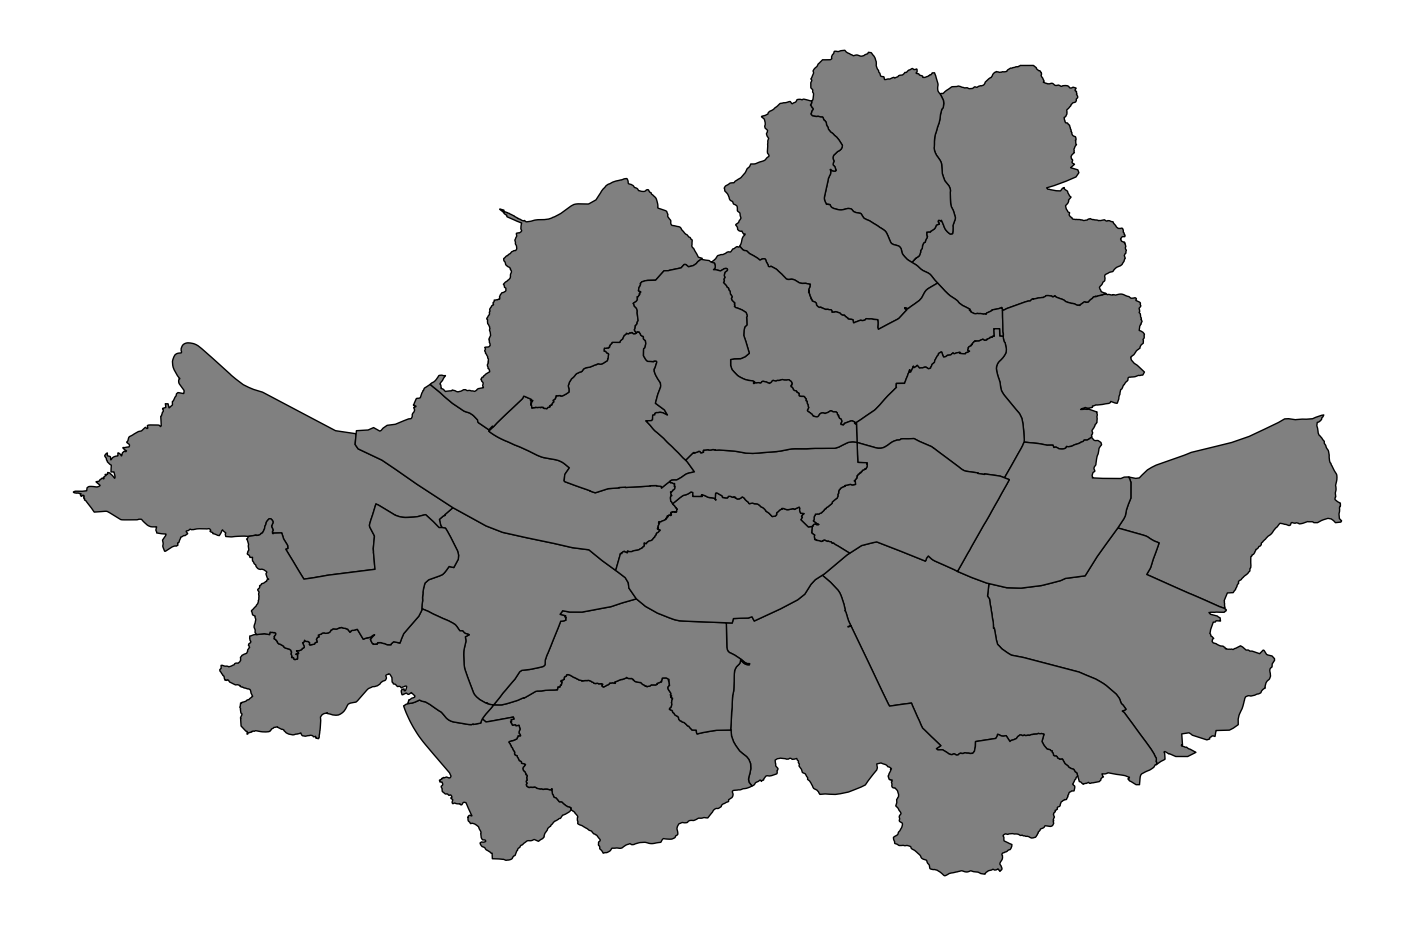

In [23]:
fig = plt.figure(figsize=(18,13))
ax = fig.subplots(1,1)

gpd_gu2.plot(color='gray', ax=ax, edgecolor='k')

ax.set_axis_off()
plt.show()

In [48]:
# seoul_file = "data/kostat/seoul_municipalities.shp"
# seoul = gpd.read_file(seoul_file, encoding='euckr')

# ax = seoul.plot(figsize=(11, 11), color="w", edgecolor="k")
# ax.set_title("서울 특별시 기초구역도")
# ax.set_axis_off()
# plt.show()

# 3. 단계구분도 시각화

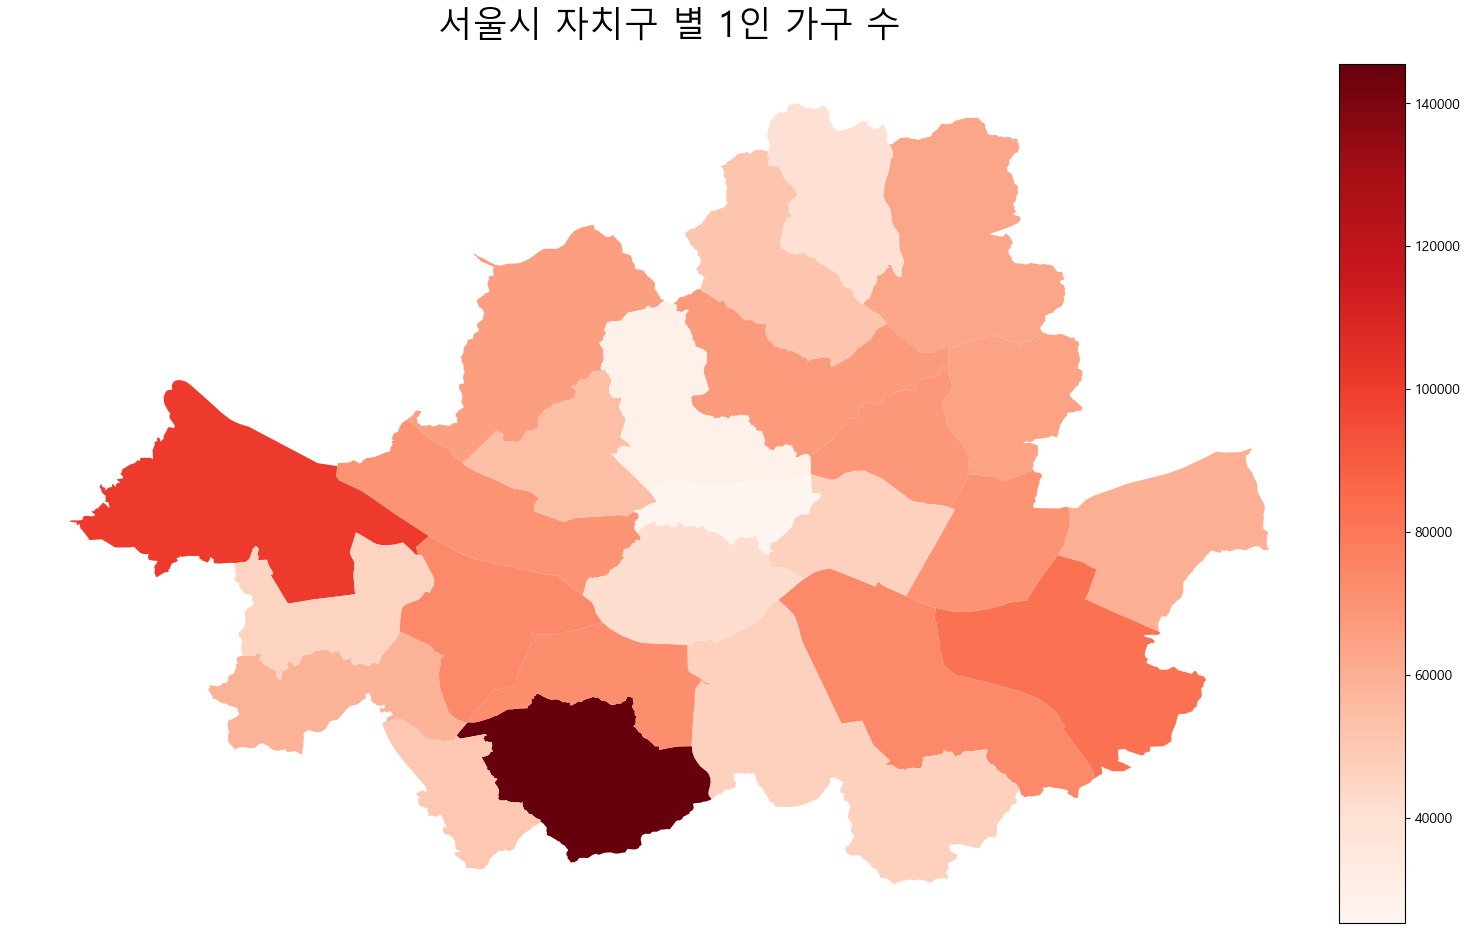

In [25]:
import geopandas as gpd  
from fiona.crs import from_epsg
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig = plt.figure(figsize=(18, 13))
ax = fig.subplots(1, 1)
 
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
 
# 단계구분도
gpd_gu2.plot("1인가구수", ax=ax, legend=True,  cax=cax, cmap='Reds')
ax.set_title("서울시 자치구 별 1인 가구 수", fontsize=25, pad=20)

ax.set_axis_off()  # 축 제거

# 4. text추가 & 최종 결과

자치구명을 추가하기 위해 위도, 경도 값과 좌표계가 다르기 때문에 경계 데이터의 중점에 접근하는것
중점의 좌표는 앞서 보았듯이 , gpd_gu2.geometry.centroid로 구할 수 있다.

중점의 x좌표는 gpd_gu2.center.iloc[idx].xy[0][0]

중점의 y좌표는 gpd_gu2.center.iloc[idx].xy[1][0]

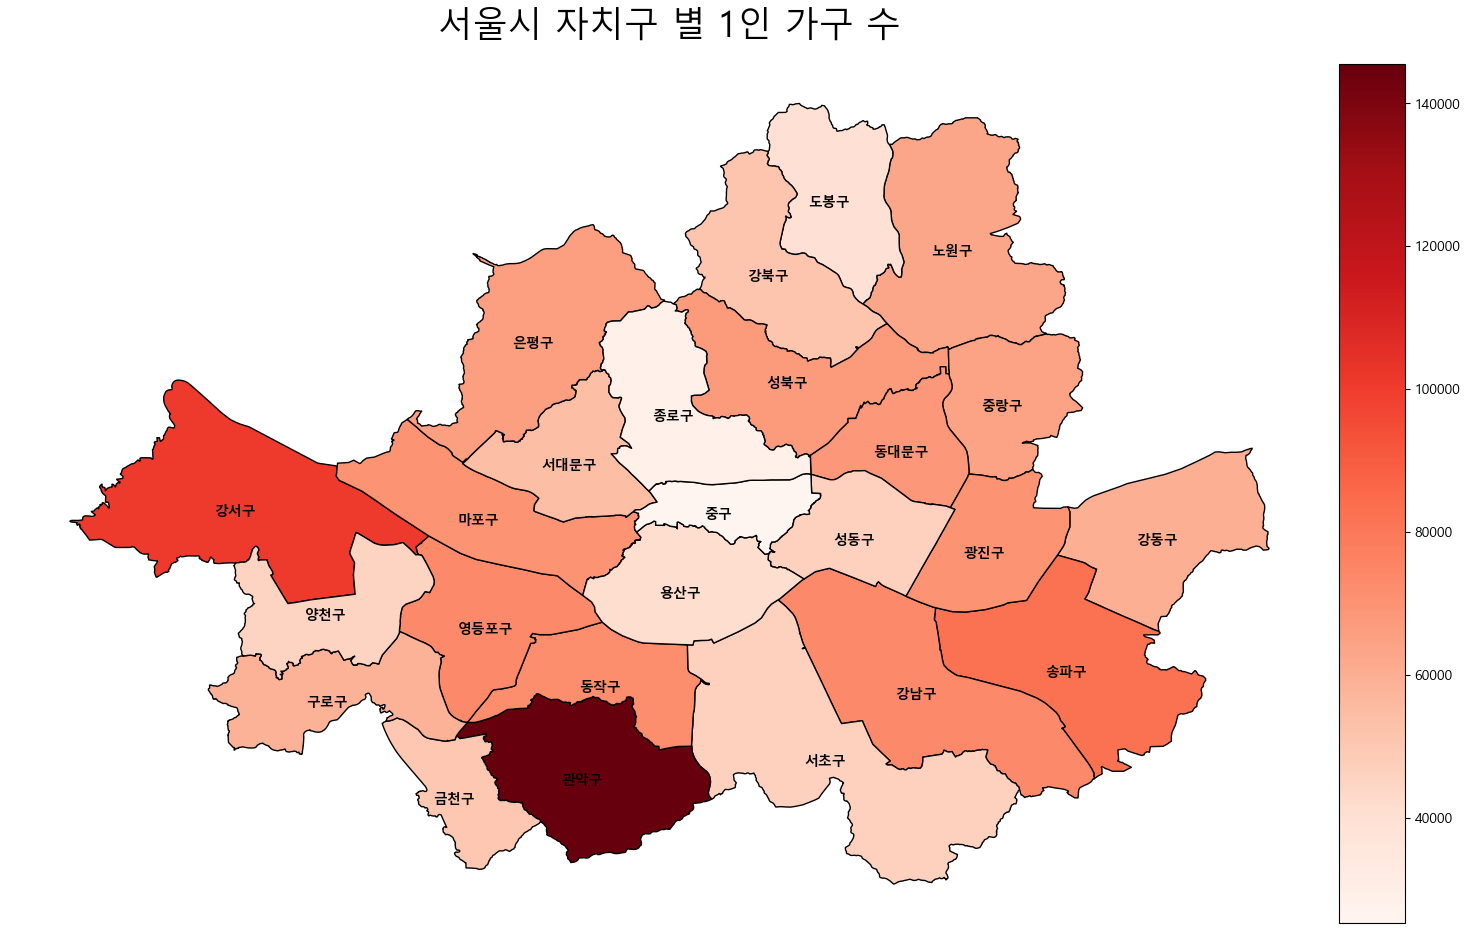

In [29]:
# 지역명 추가 
fig = plt.figure(figsize=(18, 13))
ax = fig.subplots(1, 1)
 
# 범례
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
 
# 단계구분도
gpd_gu2.plot("1인가구수", ax=ax, legend=True,  cax=cax, cmap='Reds', edgecolor='k')
ax.set_title("서울시 자치구 별 1인 가구 수", fontsize=25, pad=20)
# ---------------------------------------------------

for idx in range(len(gpd_gu2)): 
  lat = gpd_gu2.center.iloc[idx].xy[0][0]  # x좌표
  long = gpd_gu2.center.iloc[idx].xy[1][0]  # y좌표
  if gpd_gu2["1인가구수"].iloc[idx] >= 500000:
    c = "white"
  else: 
    c = 'black'
  ax.text(lat-0.01, long-0.004, gpd_gu2["자치구"].iloc[idx], fontsize=10, color=c,  fontweight='bold')
 
ax.set_axis_off()
#plt.show()